In [1]:
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline 

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
tf.test.is_built_with_cuda()

True

In [4]:
(X_train,y_train),(X_test,y_test)= tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [6]:
X_train.shape

(50000, 32, 32, 3)

In [12]:
X_train[0].shape

(32, 32, 3)

In [10]:
y_train.shape

(50000, 1)

In [11]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

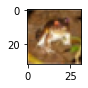

In [18]:
def plot_sample(index):
  plt.figure(figsize=(10,1))
  plt.imshow(X_train[index])

plot_sample(0)

In [20]:
classes=["airplance","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [21]:
y_train[3]

array([4], dtype=uint8)

In [22]:
classes[y_train[3][0]]

'deer'

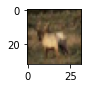

In [23]:
plot_sample(3)

In [24]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [25]:
X_test_scaled.shape

(10000, 32, 32, 3)

In [26]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [27]:
y_train_categorical=keras.utils.to_categorical(y_train,num_classes=10,dtype='float32'
)
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [29]:
y_test_categorical=keras.utils.to_categorical(y_test,num_classes=10,dtype='float32')
y_test_categorical[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [30]:
X_train_scaled.shape

(50000, 32, 32, 3)

In [44]:
model=keras.Sequential([
                        keras.layers.Flatten(input_shape=(32,32,3)),
                        keras.layers.Dense(3000,activation='relu'),
                        keras.layers.Dense(1000,activation='relu'),
                        keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )
model.fit(X_train_scaled,y_train_categorical,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.9244 - accuracy: 0.3068
Epoch 2/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6455 - accuracy: 0.4179
Epoch 3/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5492 - accuracy: 0.4540
Epoch 4/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4866 - accuracy: 0.4802
Epoch 5/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4383 - accuracy: 0.4936
Epoch 6/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3939 - accuracy: 0.5116
Epoch 7/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3547 - accuracy: 0.5244
Epoch 8/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3177 - accuracy: 0.5370
Epoch 9/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2845 - accuracy: 0.5498
Epoch 10/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.250

In [43]:
classes[np.argmax(model.predict(X_test_scaled)[600])]

'ship'

In [41]:
classes[y_test[600][0]]

'ship'

In [50]:
def get_model():
  model=keras.Sequential([
                        keras.layers.Flatten(input_shape=(32,32,3)),
                        keras.layers.Dense(3000,activation='relu'),
                        keras.layers.Dense(1000,activation='relu'),
                        keras.layers.Dense(10,activation='sigmoid')
])
  model.compile(optimizer='SGD',
                loss='categorical_crossentropy',
                metrics=['accuracy']
                )
  return model



In [58]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
  cpu_model=get_model()
  cpu_model.fit(X_train_scaled,y_train_categorical,epochs=1)

1563/1563 [==============================] - 100s 64ms/step - loss: 1.9268 - accuracy: 0.3071
1 loop, best of 1: 1min 40s per loop


In [57]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
  gpu_model=get_model()
  gpu_model.fit(X_train_scaled,y_train_categorical,epochs=1)

1563/1563 [==============================] - 10s 6ms/step - loss: 1.9361 - accuracy: 0.3016
1 loop, best of 1: 10.2 s per loop
